In [1]:
%matplotlib inline

#Enable reloading because restarting the kernel is a pain
%load_ext autoreload
%autoreload 2

import shapely
from shapely.geometry import Polygon, Point

import matplotlib.pyplot as plt
import numpy as np

from bot_2d_rep import *
from bot_2d_problem import *

import copy

from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output
import plotly.graph_objects as go
import pandas as pd

# Set up & run the simple MOO problem

In [2]:
sensor_bounds = Polygon([(.1,.1), (-.1,.1),(-.1,-.2),(.1,-.2)])

sensor_options = [FOV2D_Simple(hfov=90, distance=12, cost=80.00, color="purple", bounds_polygon=copy.deepcopy(sensor_bounds)),
                  FOV2D_Simple(hfov=270, distance=10, cost=200.00, color="green", bounds_polygon=copy.deepcopy(sensor_bounds)),
                  FOV2D_Simple(hfov=60, distance=20, cost=150.00, color="orange", bounds_polygon=copy.deepcopy(sensor_bounds)),
                  FOV2D_Simple(hfov=75, distance=9, cost=30.00, color="pink", bounds_polygon=copy.deepcopy(sensor_bounds))]

bot_diam = 1
bot_bounds = Polygon([(-1, -2), (-1, 2), (1, 2), (1, -2)])
sens_constraint = Polygon(Point(0, 0).buffer(bot_diam/1-.2).exterior.buffer(0.4))
sense_requirement =  Polygon(Point(0, 0).buffer(12).exterior.coords)
sense_requirement = shapely.affinity.scale(sense_requirement, xfact=2/3, yfact=1, origin=(0, 0))
sense_requirement = shapely.affinity.translate(sense_requirement, xoff=0, yoff=4)

bot = SimpleBot2d(bot_bounds, sense_requirement, sensor_pose_constraint=sens_constraint)

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2, RankAndCrowdingSurvival
from pymoo.core.mixed import MixedVariableGA
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

problem = SensorPkgOptimization(bot, sensor_options, 5)

algorithm = MixedVariableGA(
    pop_size=300,
    n_offsprings=120,
    sampling=CustomSensorPkgRandomSampling(),
    survival=RankAndCrowdingSurvival(),
    eliminate_duplicates=False
)

In [4]:
res = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               seed=1,
               verbose=True)

pareto_front = problem.pareto_front(use_cache=False, flatten=False)
# plot = Scatter()
# plot.add(pareto_front, plot_type="line", color="black", alpha=0.7)
# plot.add(res.F, facecolor="none", edgecolor="red")
# plot.show()

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      300 |  0.3434647721 |  0.1604389021
     2 |      420 |  0.3413213567 |  0.1604389021
     3 |      540 |  0.3292497161 |  0.1604389021
     4 |      660 |  0.3184447743 |  0.1604389021
     5 |      780 |  0.3209485988 |  0.1604389021
     6 |      900 |  0.3226465130 |  0.1604389021
     7 |     1020 |  0.3336385328 |  0.1604389021
     8 |     1140 |  0.3395135067 |  0.1604389021
     9 |     1260 |  0.3532759432 |  0.1604389021
    10 |     1380 |  0.3541480831 |  0.1604389021
    11 |     1500 |  0.3491360847 |  0.1604389021
    12 |     1620 |  0.3565059283 |  0.1604389021
    13 |     1740 |  0.3570273573 |  0.1604389021
    14 |     1860 |  0.3595846958 |  0.1604389021
    15 |     1980 |  0.3610027135 |  0.1604389021
    16 |     2100 |  0.3597172373 |  0.1604389021
    17 |     2220 |  0.3561091933 |  0.1604389021
    18 |     2340 |  0.3545116908 |  0.1604389021
    19 |     2460 |  0.3526441491 |  0.1604389021


In [5]:
import pandas as pd

import plotly.express as px

results = res.F

# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=['Perception Coverage', 'Cost'])
df_results['Perception Coverage'] = (1- df_results['Perception Coverage']) * 100
df_results['Index'] = df_results.index

# Create the scatter plot
fig = px.scatter(df_results, x='Cost', y='Perception Coverage', hover_data=['Index'], title=f"Objective Space (best of {results.shape[0]} concepts)", template="plotly_white")
fig.add_scatter(x=[0], y=[100], mode='markers', marker=dict(symbol='star', size=12, color='gold'), name='Ideal Point')
# Show the plot
fig.show()


Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [0.20229874117820218, 0.5828005526289163, 48.57119958739516, 0.21454307220719465, 0.9376343657722435, 209.30821131732174, 0.3182641601544739, -0.9102393060349041, 350.3885247406738]
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Validity: True
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Validity: True
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Vali

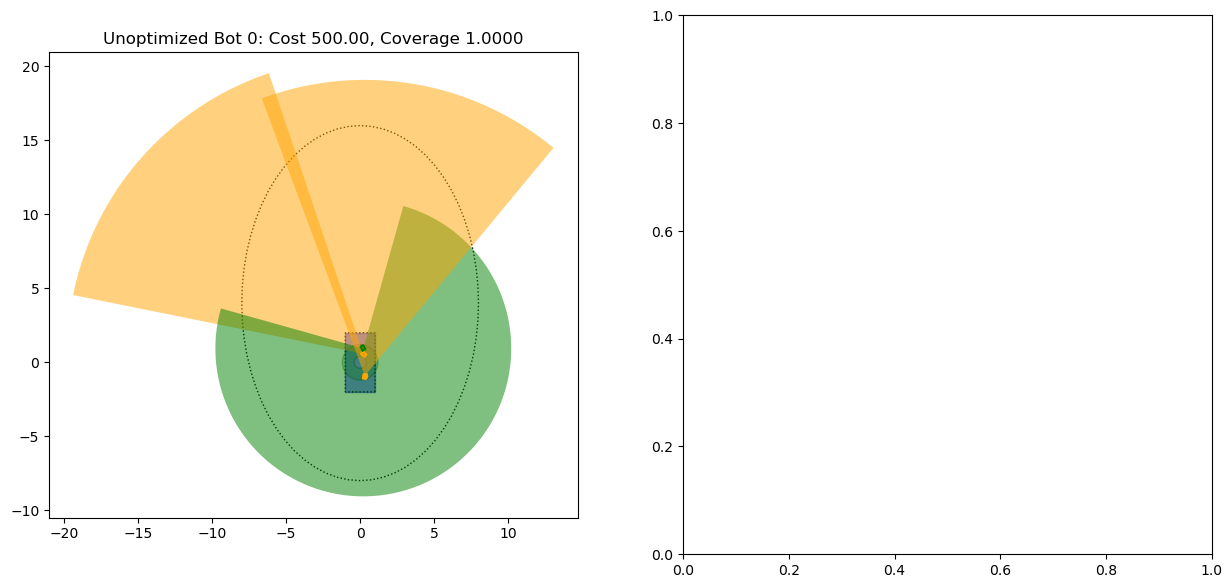

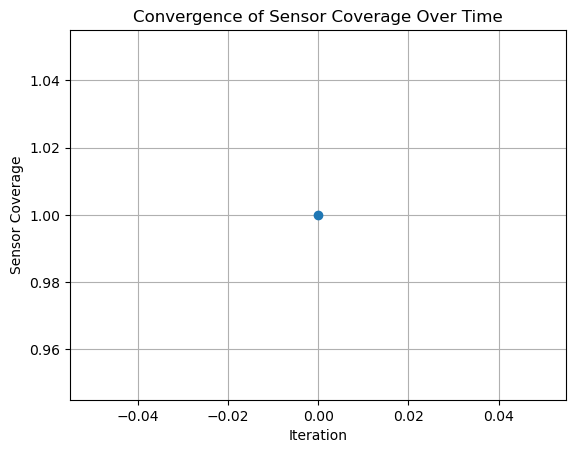

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [0.20229874117820218, 0.5828005526289163, 48.57119958739516, 0.21454307220719465, 0.9376343657722435, 209.30821131732174, 0.3182641601544739, -0.9102393060349041, 350.3885247406738]
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Validity: True
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Validity: True
Params: [ 2.02298741e-01  5.82800553e-01  4.85711996e+01  2.14543072e-01
  9.37634366e-01  2.09308211e+02  3.18264160e-01 -9.10239306e-01
  3.50388525e+02]
 Vali

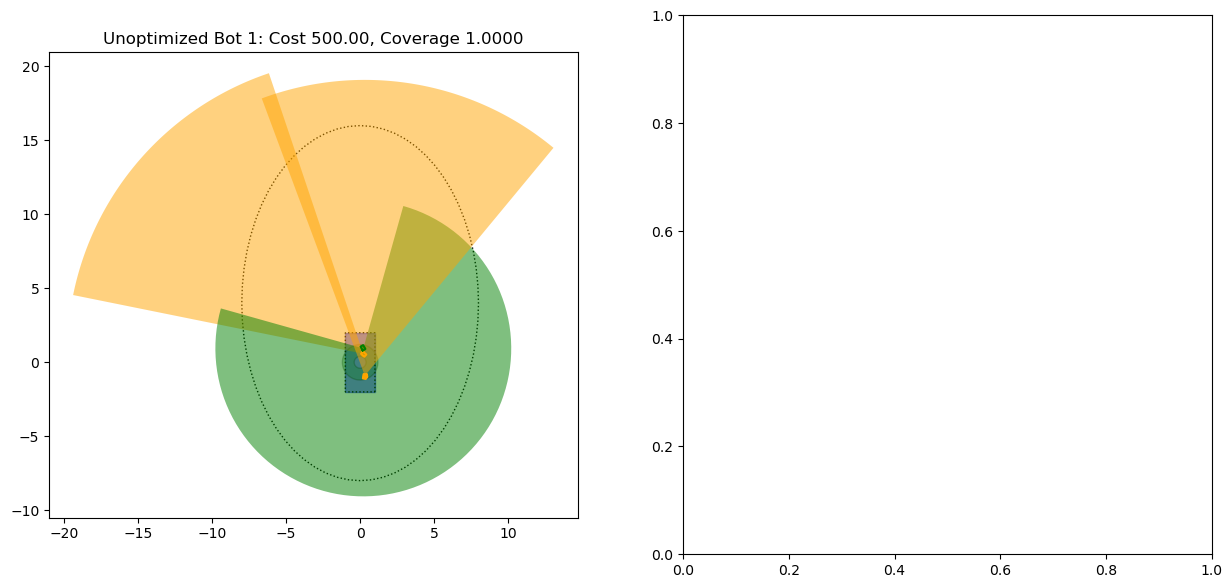

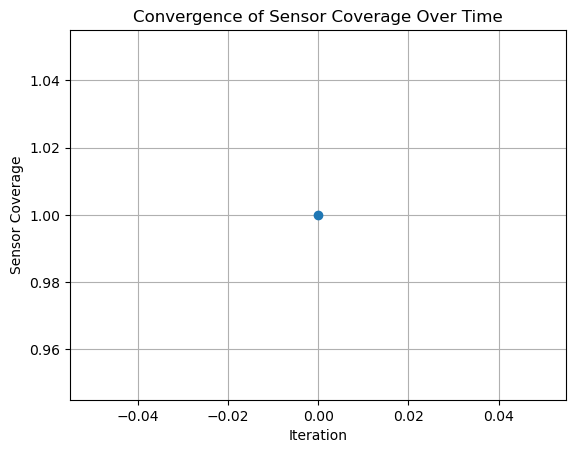

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        , -1.19951818,
       -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ,   1.19951818,   1.19951818, 360.        ]))
Initial Params: [0.5384791502112299, 0.35363516076603396, 79.23612190561029, 0.46470374535738895, 0.7657898307572775, 358.2165572808787, -0.30876665034239126, 0.7046983263483274, 263.74098514093095, 0.19593237040959313, 0.9545236321493455, 149.22829238967256]
Params: [ 5.38479150e-01  3.53635161e-01  7.92361219e+01  4.64703745e-01
  7.65789831e-01  3.58216557e+02 -3.08766650e-01  7.04698326e-01
  2.63740985e+02  1.95932370e-01  9.54523632e-01  1.49228292e+02]
 Validity: True
Params: [ 5.38479150e-01  3.53635161e-01  7.92361219e+01  4.64703745e-01
  7.65789831e-01  3.58216557e+02 -3.08766650e-01  7.04698326e-

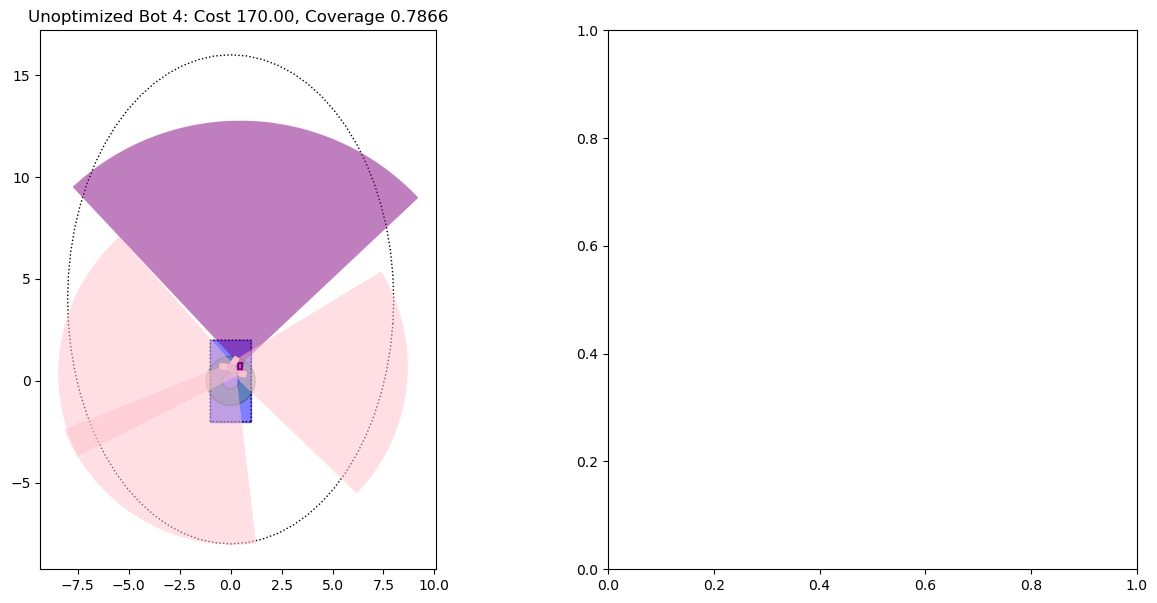

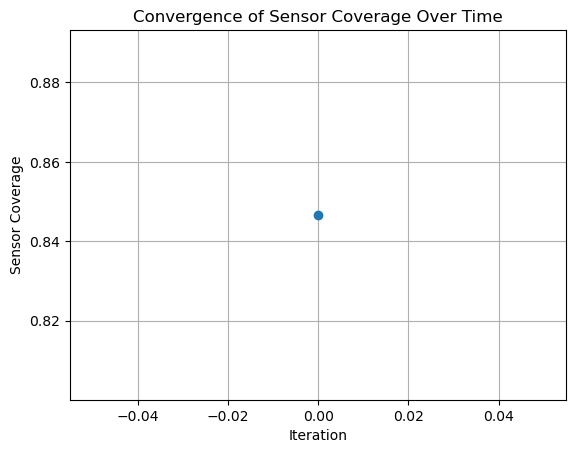

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.9134635913913052, 0.4568271963001458, 151.3281981984826, -0.6348043702189455, 0.17001239229324921, 197.3397232823782, -0.08476294259221792, 1.0184176045749092, 345.71757913280027]
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Va

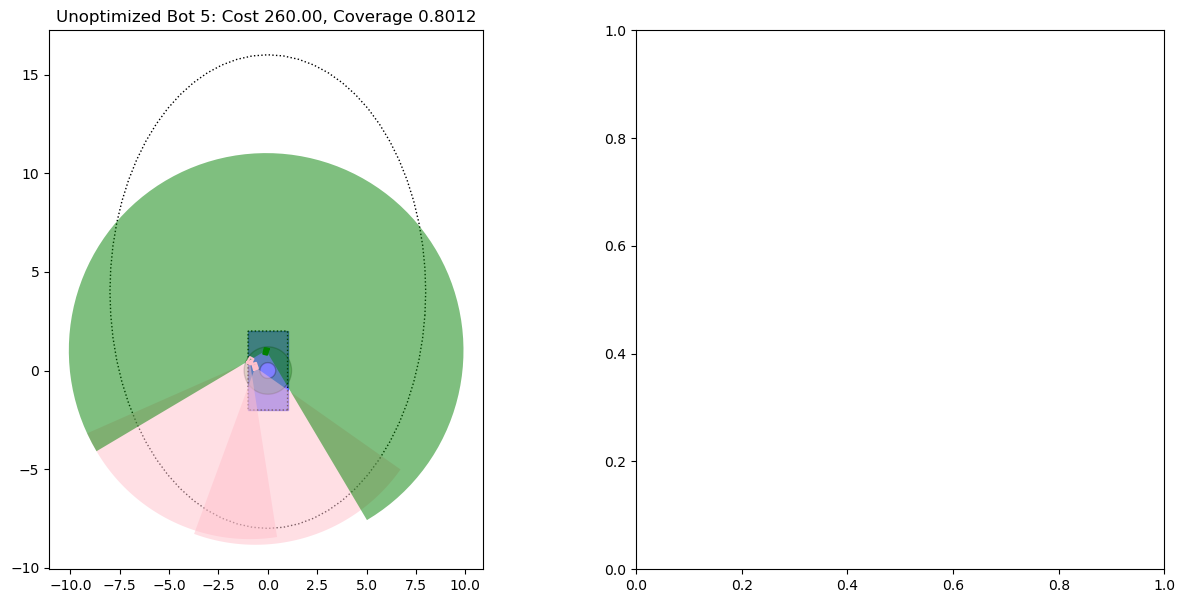

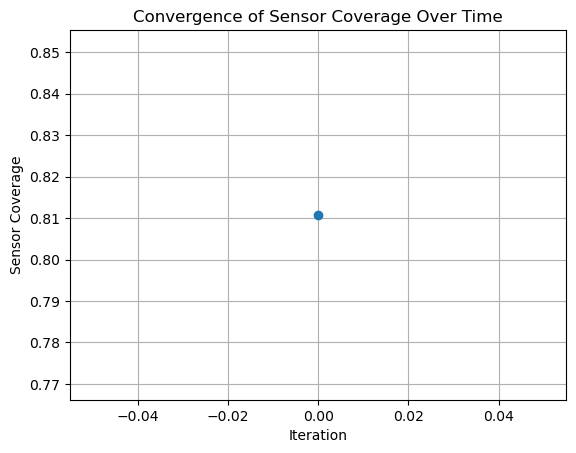

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [0.4651015659077608, 0.3944512573258764, 74.44813943765794, -0.5496207406250764, 0.7255162773339724, 345.90384389288005, -0.2635725080487516, 0.8853802406212411, 182.7501888144438]
Params: [ 4.65101566e-01  3.94451257e-01  7.44481394e+01 -5.49620741e-01
  7.25516277e-01  3.45903844e+02 -2.63572508e-01  8.85380241e-01
  1.82750189e+02]
 Validity: True
Params: [ 4.65101566e-01  3.94451257e-01  7.44481394e+01 -5.49620741e-01
  7.25516277e-01  3.45903844e+02 -2.63572508e-01  8.85380241e-01
  1.82750189e+02]
 Validity: True
Params: [ 4.65101566e-01  3.94451257e-01  7.44481394e+01 -5.49620741e-01
  7.25516277e-01  3.45903844e+02 -2.63572508e-01  8.85380241e-01
  1.82750189e+02]
 Valid

/Users/robosquiggles/miniforge3/envs/blenv/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



Params: [1.19951817e+00 1.19951818e+00 9.19456779e+01 1.56939290e-01
 1.19951818e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951818e+00 1.19951817e+00 9.19456779e+01 1.56939290e-01
 1.19951818e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951818e+00 1.19951818e+00 9.19456779e+01 1.56939290e-01
 1.19951818e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951818e+00 1.19951818e+00 9.19456779e+01 1.56939305e-01
 1.19951818e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951818e+00 1.19951818e+00 9.19456779e+01 1.56939290e-01
 1.19951817e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951818e+00 1.19951818e+00 9.19456779e+01 1.56939290e-01
 1.19951818e+00 3.57674892e+02 1.19951809e+00 1.19948701e+00
 1.66945500e+02]
 Validity: False
Params: [1.19951

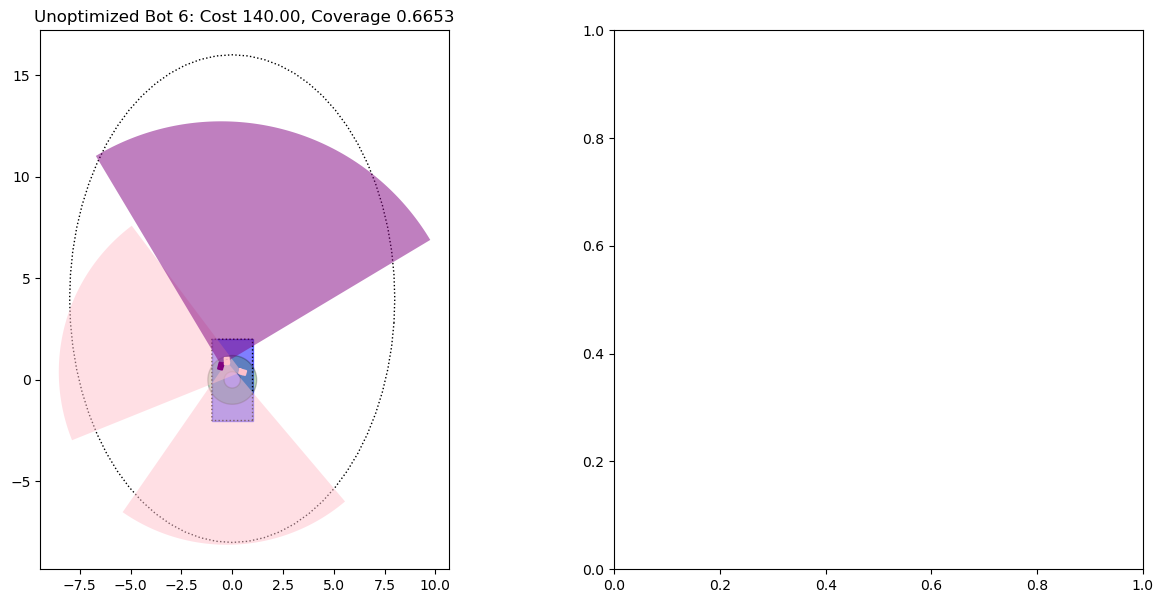

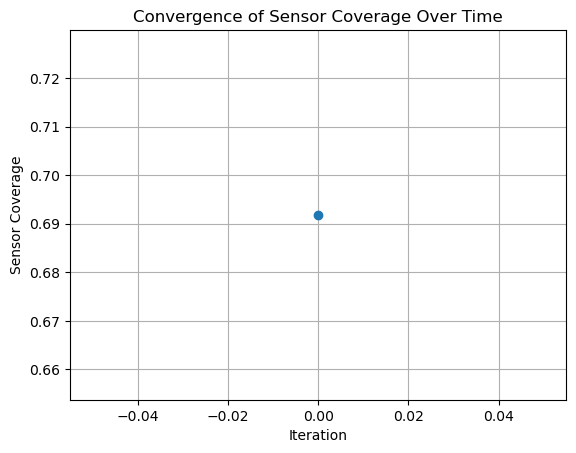

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ]))
Initial Params: [0.4642703944642112, 0.9788783165664396, 341.628193485286]
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427041   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887833 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.6281935 ]
 Validity: True
Params: [  0.46621979   0.98188512 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188512 341.62819355]
 Validity: False
Params: [  0.4662198    0.98188512 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188513 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188512 341.62819357]
 Validity: False
Params: [  0.47584911   0.99686011 341.62820122]
 Validity: False
Params: [  0.47584911   0

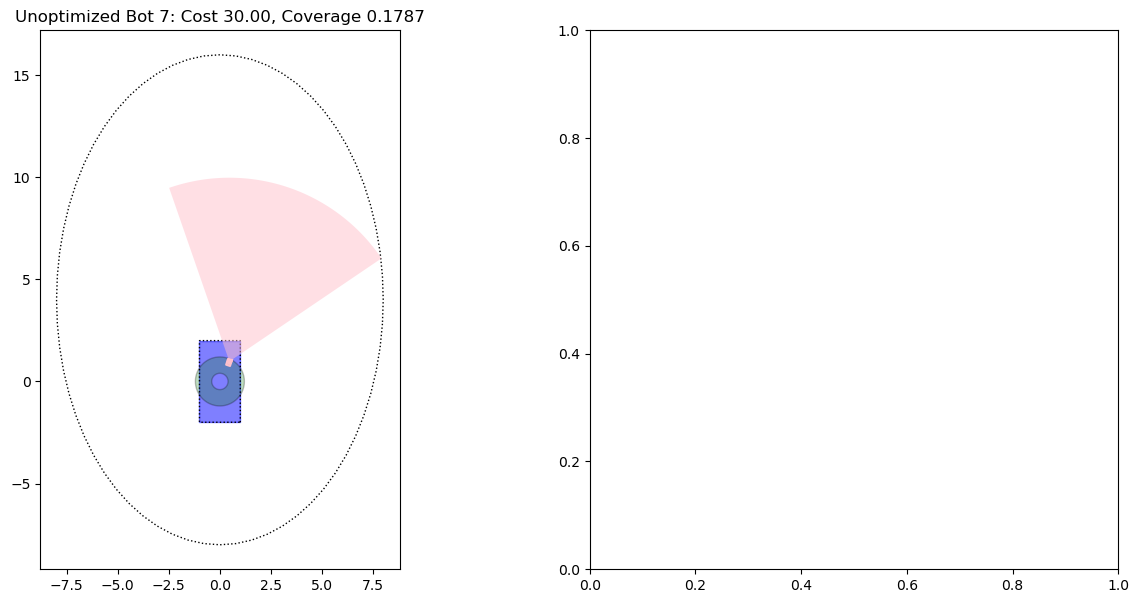

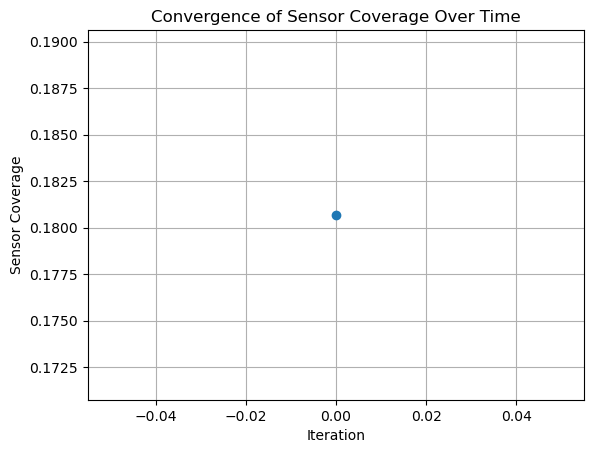

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ]))
Initial Params: [0.4642703944642112, 0.9788783165664396, 341.628193485286]
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427041   0.97887832 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887833 341.62819349]
 Validity: True
Params: [  0.46427039   0.97887832 341.6281935 ]
 Validity: True
Params: [  0.46621979   0.98188512 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188512 341.62819355]
 Validity: False
Params: [  0.4662198    0.98188512 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188513 341.62819355]
 Validity: False
Params: [  0.46621979   0.98188512 341.62819357]
 Validity: False
Params: [  0.47584911   0.99686011 341.62820122]
 Validity: False
Params: [  0.47584911   0

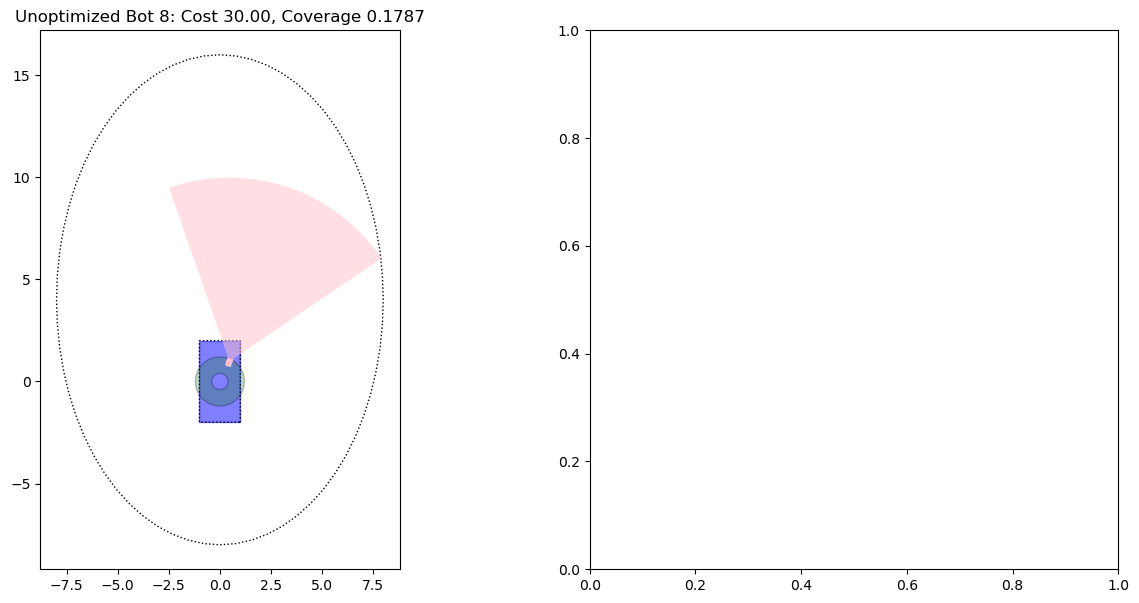

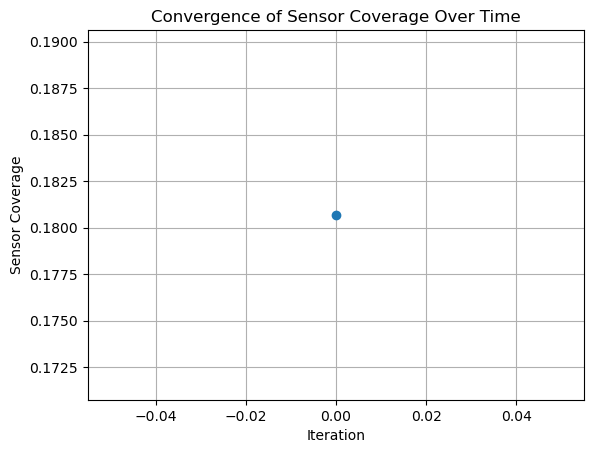

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [0.8701498532119623, 0.20965869162949252, 314.704960903361, 0.07158530982731895, 0.8851157745901864, 28.269388910421554, 0.40917034344469133, 0.831580200766606, 173.3029121751493]
Params: [8.70149853e-01 2.09658692e-01 3.14704961e+02 7.15853098e-02
 8.85115775e-01 2.82693889e+01 4.09170343e-01 8.31580201e-01
 1.73302912e+02]
 Validity: True
Params: [8.70149853e-01 2.09658692e-01 3.14704961e+02 7.15853098e-02
 8.85115775e-01 2.82693889e+01 4.09170343e-01 8.31580201e-01
 1.73302912e+02]
 Validity: True
Params: [8.70149853e-01 2.09658692e-01 3.14704961e+02 7.15853098e-02
 8.85115775e-01 2.82693889e+01 4.09170343e-01 8.31580201e-01
 1.73302912e+02]
 Validity: True
Params: [8.7014986

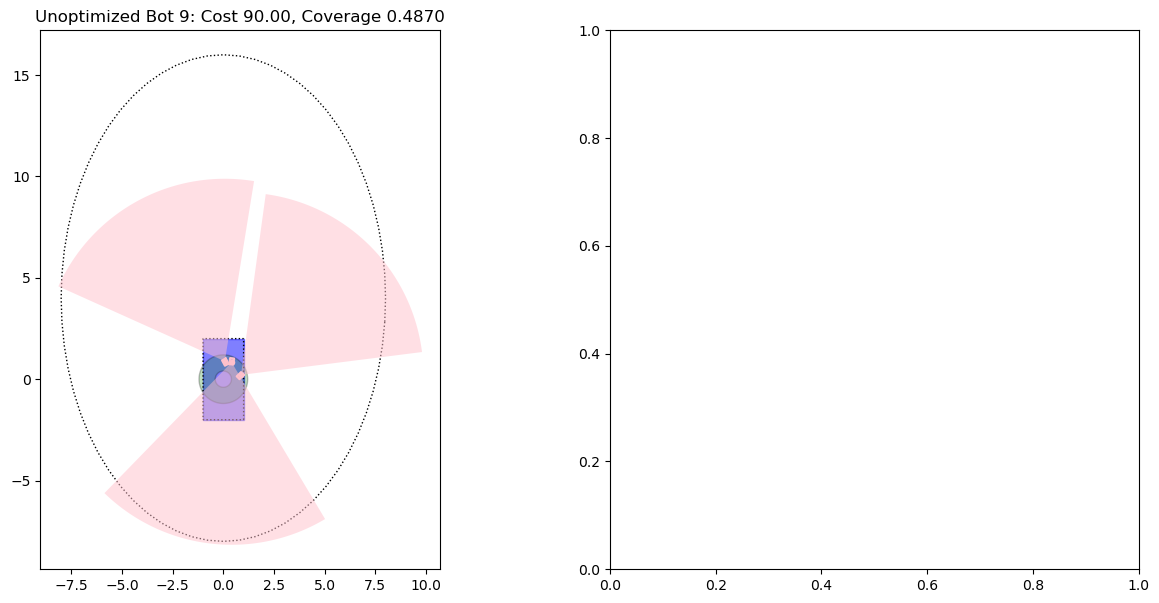

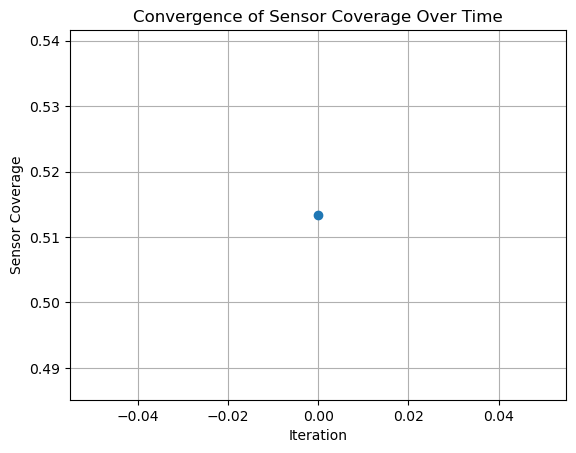

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ]))
Initial Params: [0.18396598910415335, 0.9601381725754596, 181.1870364167012, -0.25454479818094444, -0.860727394042565, 357.1976410024627]
Params: [ 1.83965989e-01  9.60138173e-01  1.81187036e+02 -2.54544798e-01
 -8.60727394e-01  3.57197641e+02]
 Validity: True
Params: [ 1.83965989e-01  9.60138173e-01  1.81187036e+02 -2.54544798e-01
 -8.60727394e-01  3.57197641e+02]
 Validity: True
Params: [ 1.83965989e-01  9.60138173e-01  1.81187036e+02 -2.54544798e-01
 -8.60727394e-01  3.57197641e+02]
 Validity: True
Params: [ 1.83966004e-01  9.60138173e-01  1.81187036e+02 -2.54544798e-01
 -8.60727394e-01  3.57197641e+02]
 Validity: True
Params: [ 1.83965989e-01  9.60138187e-01  1.81187036e+02 -2.54544798e-01
 -8.60727394e-01  3.57197641e+02]
 Validity: True
Params: [ 1.83965989e-01  9.60138173e-

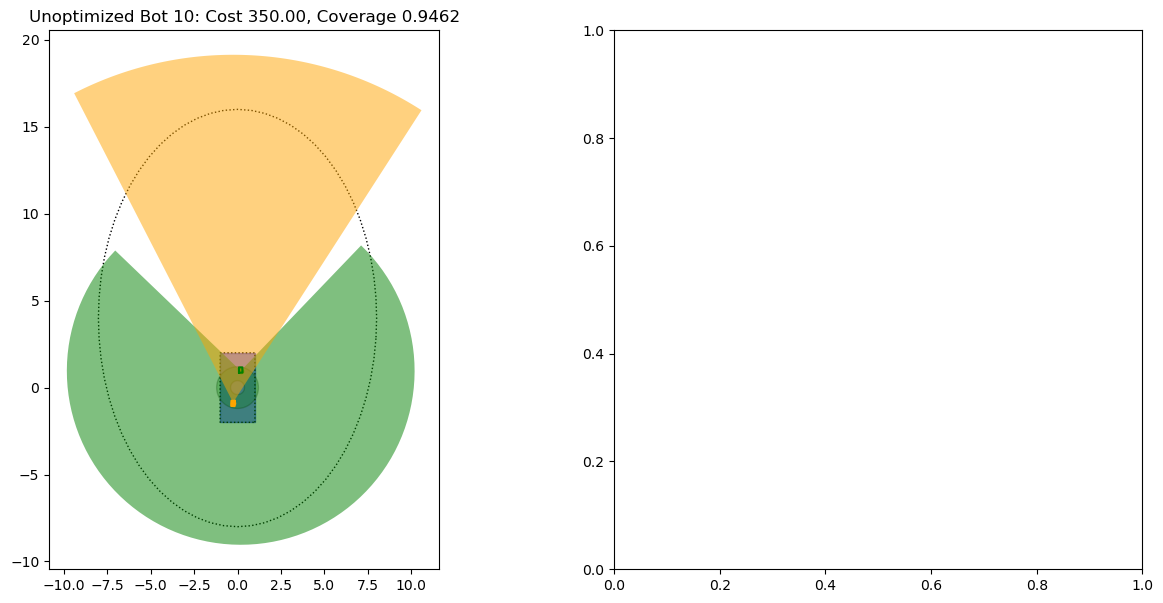

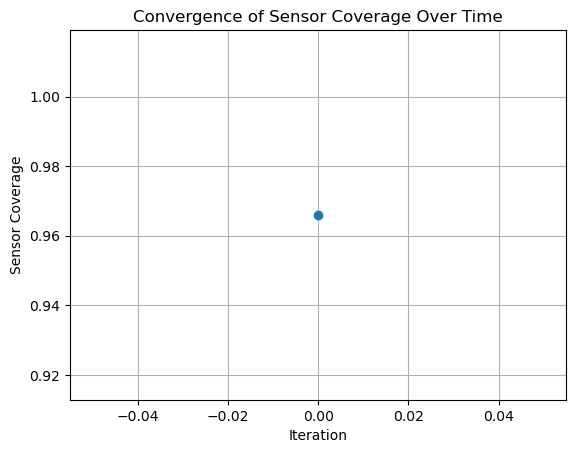

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ]))
Initial Params: [-0.4787999819456101, 0.9826878350866805, 26.72050859293513, 0.2831602617367017, 0.7312912067290924, 319.1051741369165]
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799967e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687850e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01

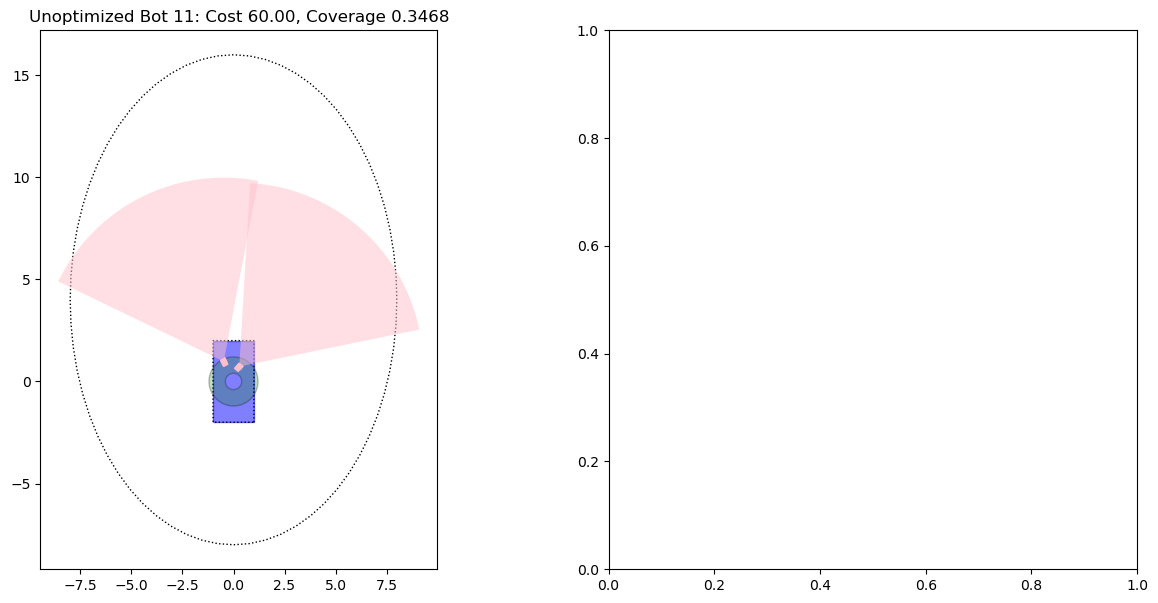

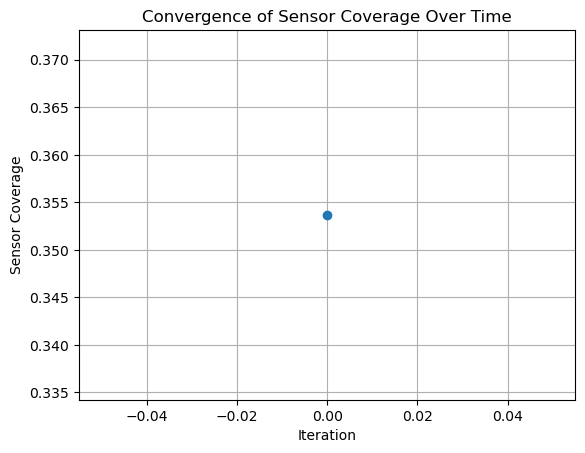

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ]))
Initial Params: [0.308000878473086, 0.882844564720477, 174.08425102502363, -0.08646191077784868, 0.9991670318446559, 351.71482990597434]
Params: [ 3.08000878e-01  8.82844565e-01  1.74084251e+02 -8.64619108e-02
  9.99167032e-01  3.51714830e+02]
 Validity: True
Params: [ 3.08000878e-01  8.82844565e-01  1.74084251e+02 -8.64619108e-02
  9.99167032e-01  3.51714830e+02]
 Validity: True
Params: [ 3.08000878e-01  8.82844565e-01  1.74084251e+02 -8.64619108e-02
  9.99167032e-01  3.51714830e+02]
 Validity: True
Params: [ 3.08000893e-01  8.82844565e-01  1.74084251e+02 -8.64619108e-02
  9.99167032e-01  3.51714830e+02]
 Validity: True
Params: [ 3.08000878e-01  8.82844580e-01  1.74084251e+02 -8.64619108e-02
  9.99167032e-01  3.51714830e+02]
 Validity: True
Params: [ 3.08000878e-01  8.82844565e-0

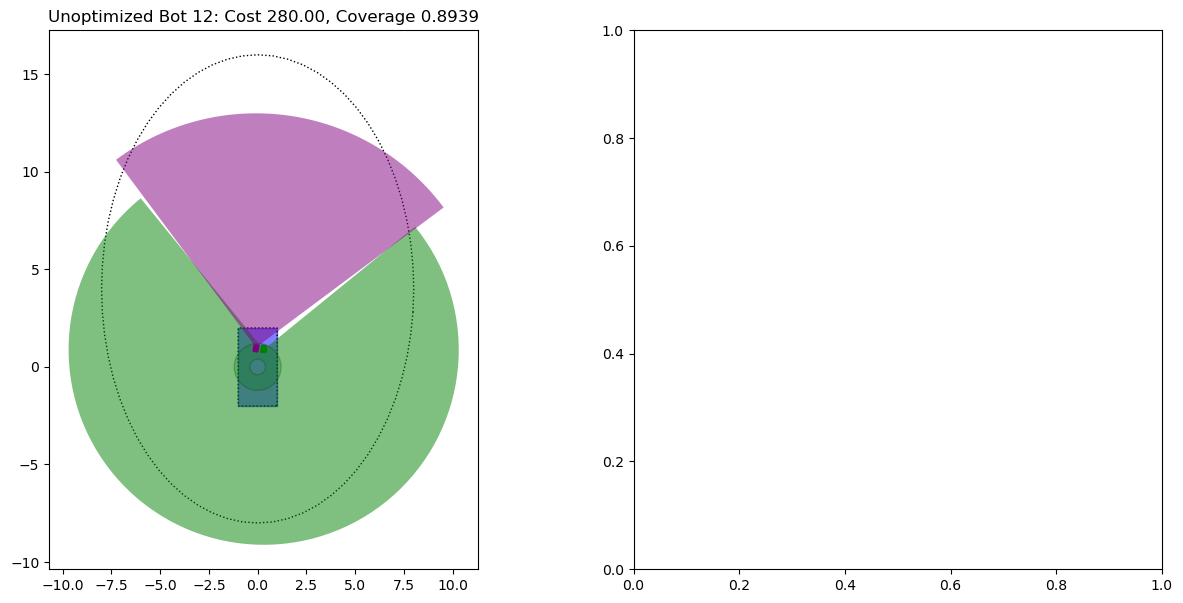

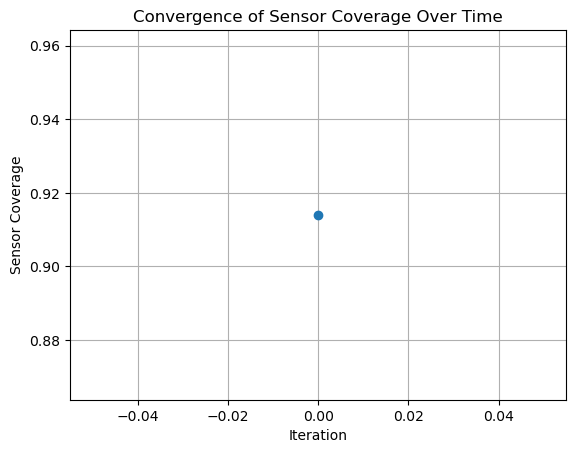

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        , -1.19951818,
       -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ,   1.19951818,   1.19951818, 360.        ]))
Initial Params: [0.8851572479823493, 0.21206325945655535, 320.0317555395719, -0.9223333814512117, 0.19603537407708793, 241.02667455286326, -0.4614043820321234, 0.849994240377365, 28.022572519102205, 0.2006219559093117, 0.8332014522419595, 151.6626021114298]
Params: [ 8.85157248e-01  2.12063259e-01  3.20031756e+02 -9.22333381e-01
  1.96035374e-01  2.41026675e+02 -4.61404382e-01  8.49994240e-01
  2.80225725e+01  2.00621956e-01  8.33201452e-01  1.51662602e+02]
 Validity: True
Params: [ 8.85157248e-01  2.12063259e-01  3.20031756e+02 -9.22333381e-01
  1.96035374e-01  2.41026675e+02 -4.61404382e-01  8.49994240e-01

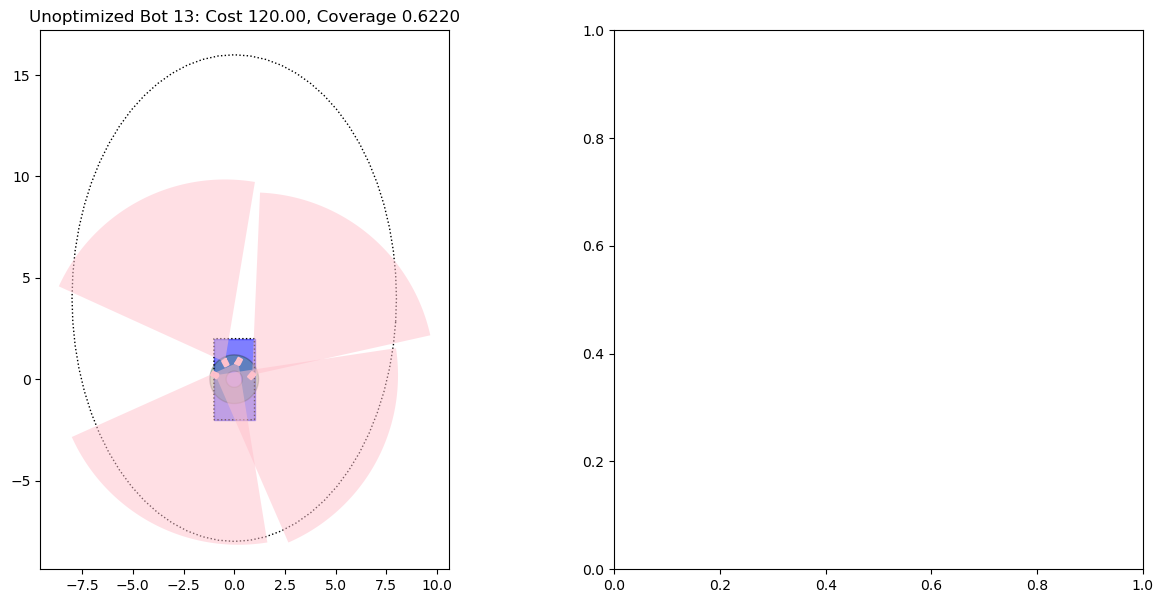

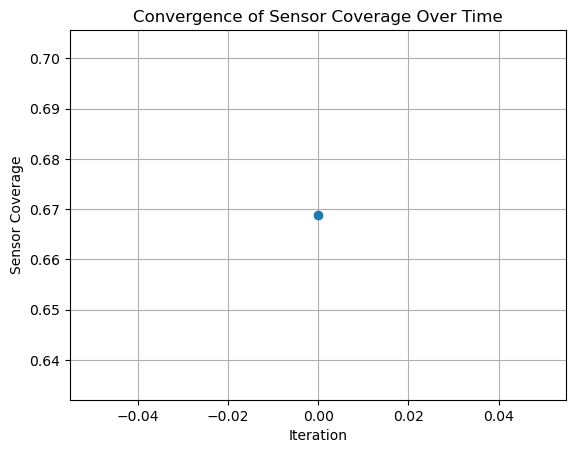

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ]))
Initial Params: [0.8489383899947137, 0.3653454640757403, 81.67978590166061, -0.2301909126662144, 0.7647358335922222, 351.6914943165463]
Params: [ 8.48938390e-01  3.65345464e-01  8.16797859e+01 -2.30190913e-01
  7.64735834e-01  3.51691494e+02]
 Validity: True
Params: [ 8.48938390e-01  3.65345464e-01  8.16797859e+01 -2.30190913e-01
  7.64735834e-01  3.51691494e+02]
 Validity: True
Params: [ 8.48938390e-01  3.65345464e-01  8.16797859e+01 -2.30190913e-01
  7.64735834e-01  3.51691494e+02]
 Validity: True
Params: [ 8.48938405e-01  3.65345464e-01  8.16797859e+01 -2.30190913e-01
  7.64735834e-01  3.51691494e+02]
 Validity: True
Params: [ 8.48938390e-01  3.65345479e-01  8.16797859e+01 -2.30190913e-01
  7.64735834e-01  3.51691494e+02]
 Validity: True
Params: [ 8.48938390e-01  3.65345464e-01

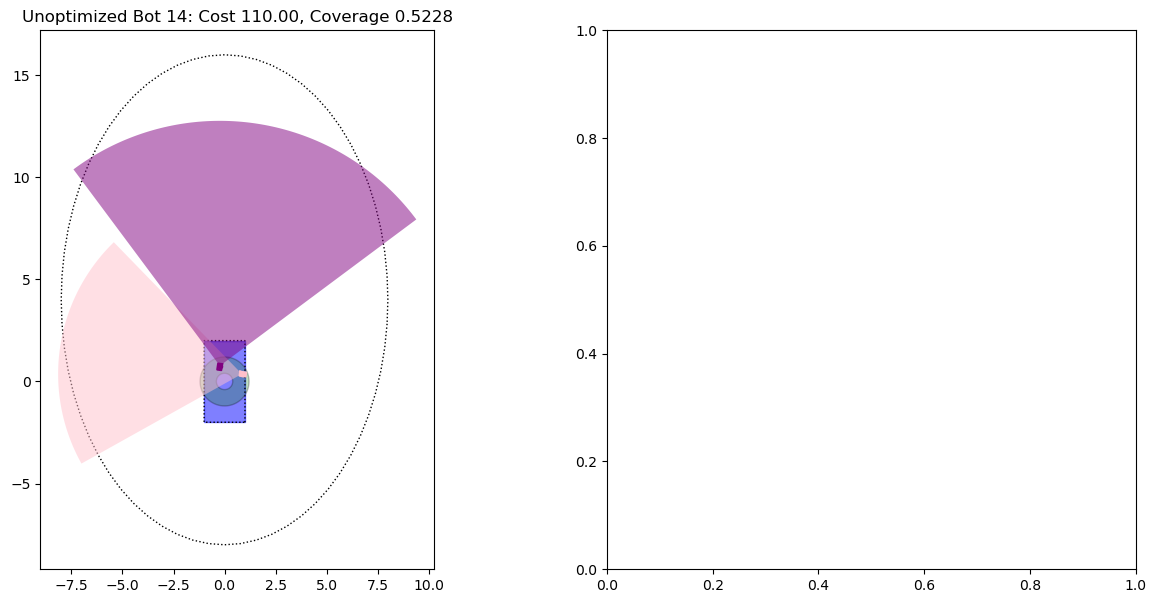

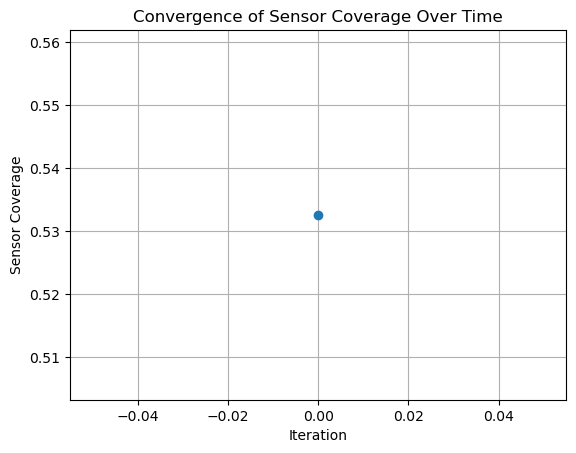

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [0.6222650705287687, 0.582820769416216, 303.3027230904657, -0.6555185554160448, 0.8047981527909567, 139.24031458394398, -0.07376059871640558, 1.0368047709177992, 351.88444423276763]
Params: [ 6.22265071e-01  5.82820769e-01  3.03302723e+02 -6.55518555e-01
  8.04798153e-01  1.39240315e+02 -7.37605987e-02  1.03680477e+00
  3.51884444e+02]
 Validity: True
Params: [ 6.22265071e-01  5.82820769e-01  3.03302723e+02 -6.55518555e-01
  8.04798153e-01  1.39240315e+02 -7.37605987e-02  1.03680477e+00
  3.51884444e+02]
 Validity: True
Params: [ 6.22265071e-01  5.82820769e-01  3.03302723e+02 -6.55518555e-01
  8.04798153e-01  1.39240315e+02 -7.37605987e-02  1.03680477e+00
  3.51884444e+02]
 Vali

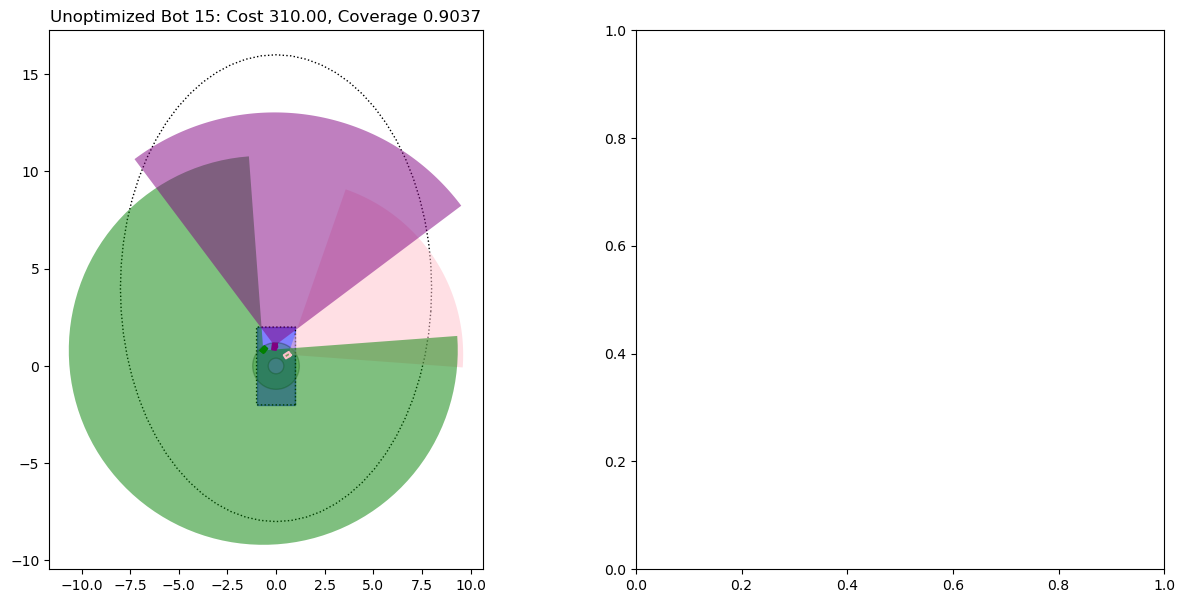

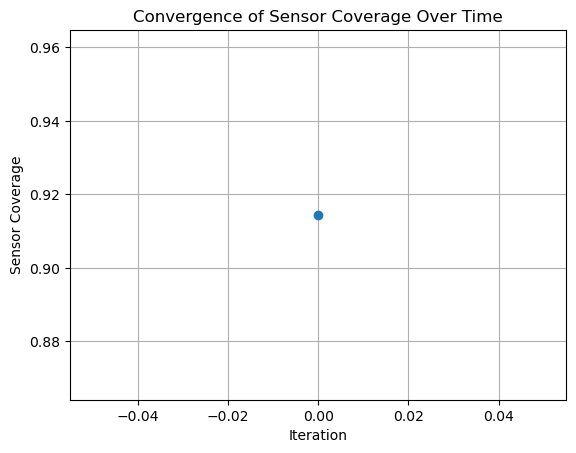

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.7651822903706599, 0.525496270834162, 53.06872438131405, 0.6411233377310441, 0.6527449290130601, 201.26146739638978, 0.343136611135756, -0.9134428315934089, 356.25185609695114]
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validity: True
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validity: True
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validi

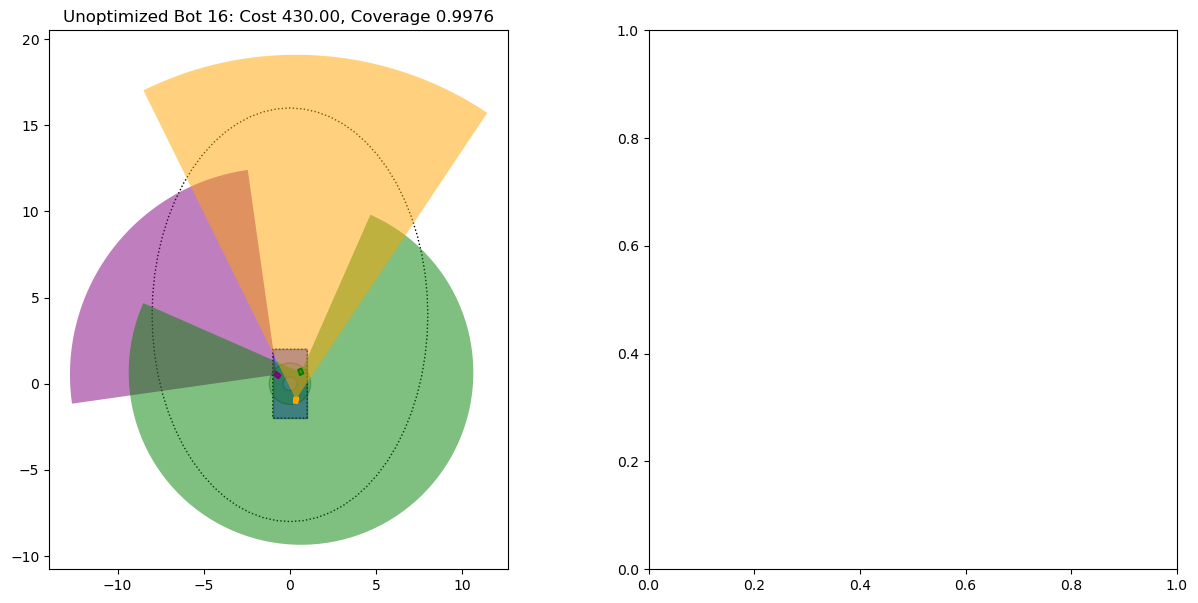

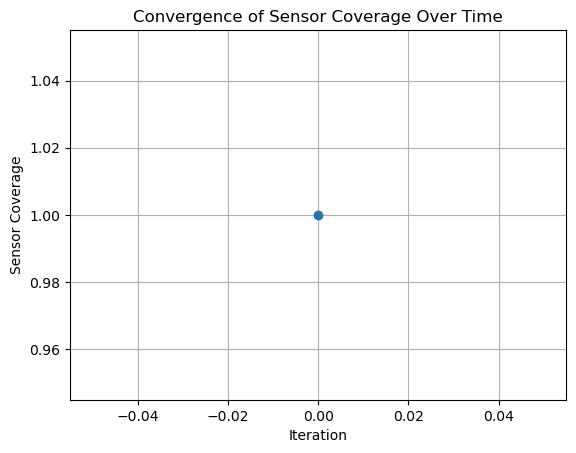

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ]))
Initial Params: [1.033792144548158, 0.3224533692040362, 8.90117352688984]
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379216 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245338 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117354]
 Validity: True
Params: [1.03921337 0.32475472 8.90116688]
 Validity: False
Params: [1.03921337 0.32475472 8.90116688]
 Validity: False
Params: [1.03921338 0.32475472 8.90116688]
 Validity: False
Params: [1.03921337 0.32475473 8.90116688]
 Validity: False
Params: [1.03921337 0.32475472 8.9011669 ]
 Validity: False
Params: [1.0659821  0.33622421 8.90116936]
 Validity: False
Params: [1.0659821  0.33622421 8.90116936]
 Validity: False
Params: [1.06598211 0.33622421 8.90116

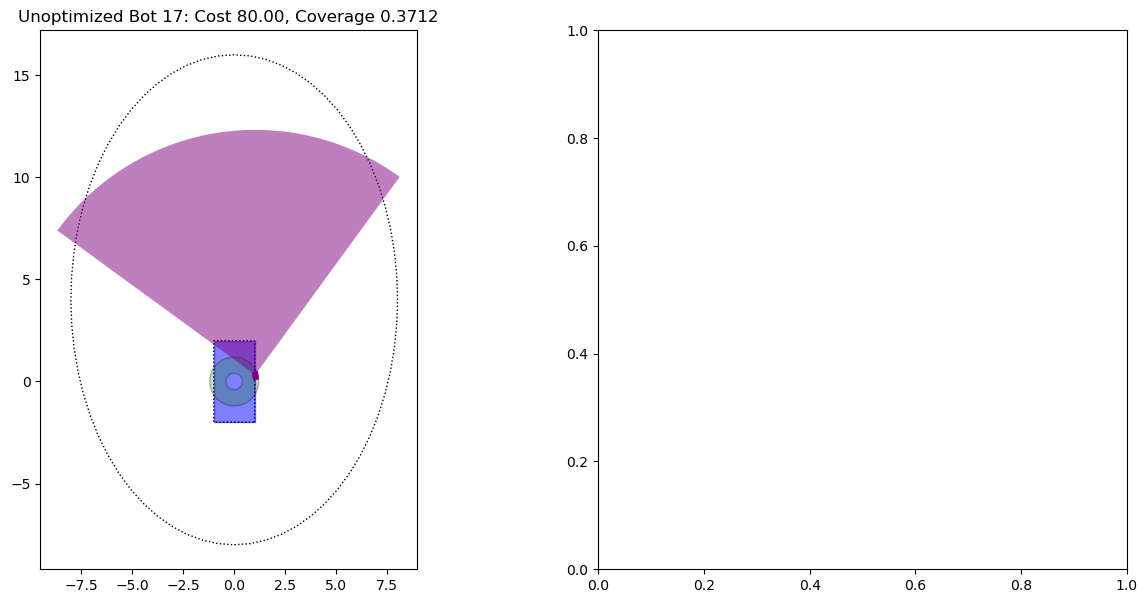

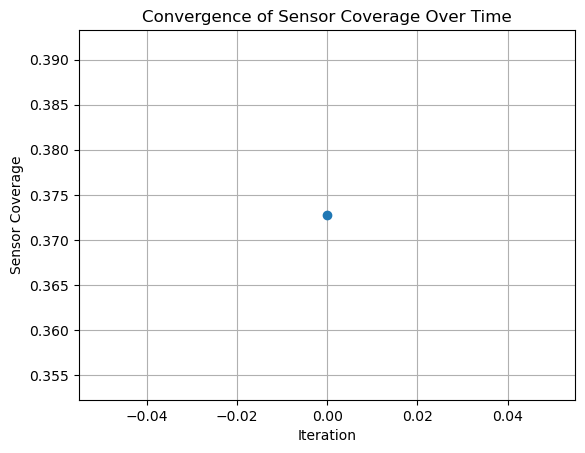

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.8245865345718616, 0.5368341705593469, 29.482944814155303, 0.09973036624021514, 0.7948155647744036, 198.67117300408216, 0.48753449759837464, -0.8421616689165337, 359.74744075858786]
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 Validity: True
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 Validity: True
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 V

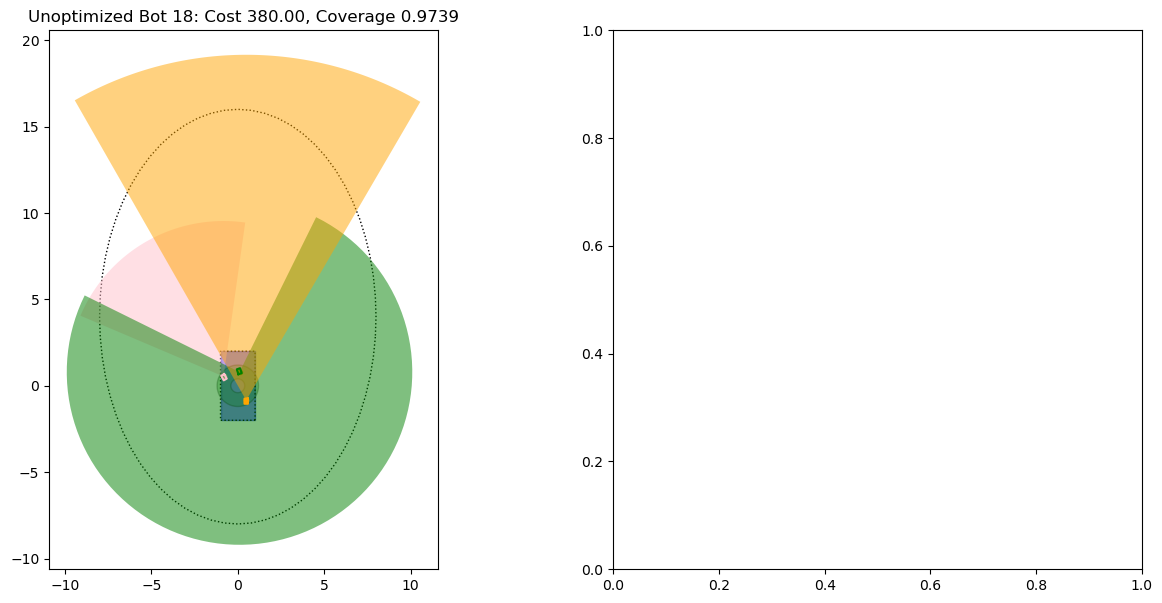

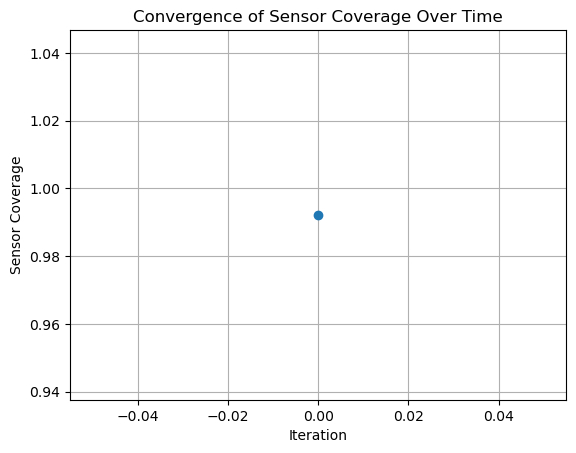

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.7651822903706599, 0.525496270834162, 53.06872438131405, 0.6411233377310441, 0.6527449290130601, 201.26146739638978, 0.343136611135756, -0.9134428315934089, 356.25185609695114]
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validity: True
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validity: True
Params: [-7.65182290e-01  5.25496271e-01  5.30687244e+01  6.41123338e-01
  6.52744929e-01  2.01261467e+02  3.43136611e-01 -9.13442832e-01
  3.56251856e+02]
 Validi

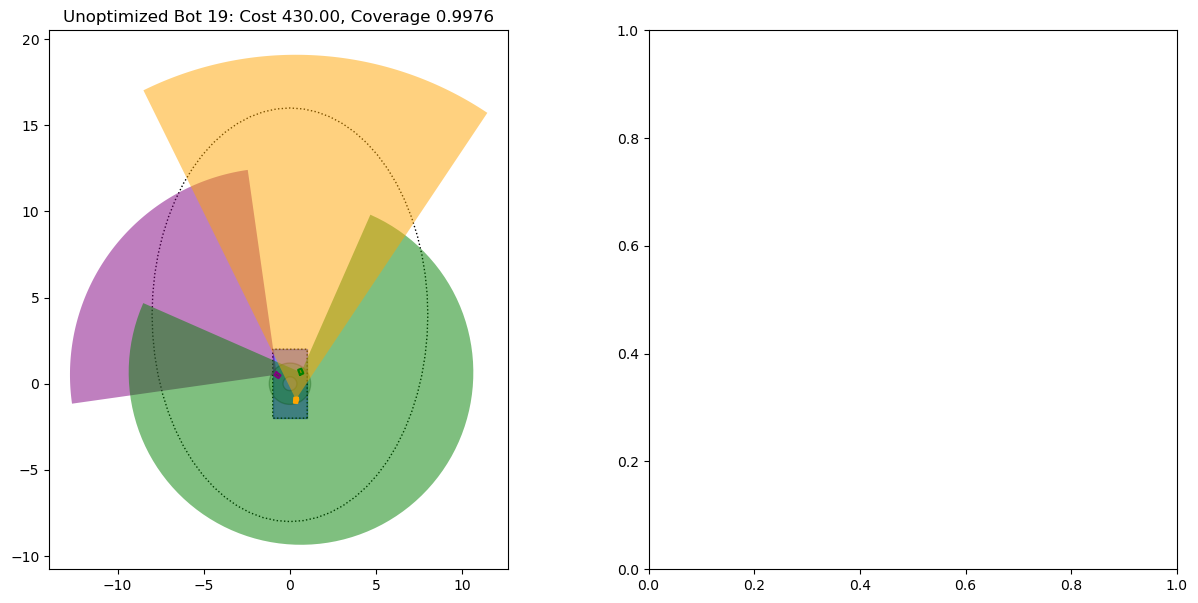

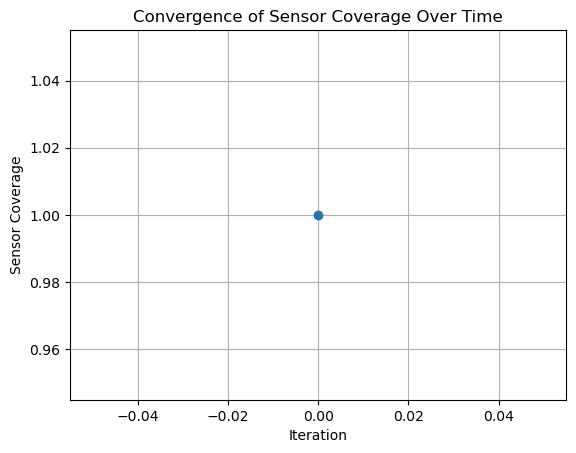

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ]))
Initial Params: [-0.4787999819456101, 0.9826878350866805, 26.72050859293513, 0.2831602617367017, 0.7312912067290924, 319.1051741369165]
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799967e-01  9.82687835e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687850e-01  2.67205086e+01  2.83160262e-01
  7.31291207e-01  3.19105174e+02]
 Validity: True
Params: [-4.78799982e-01  9.82687835e-01

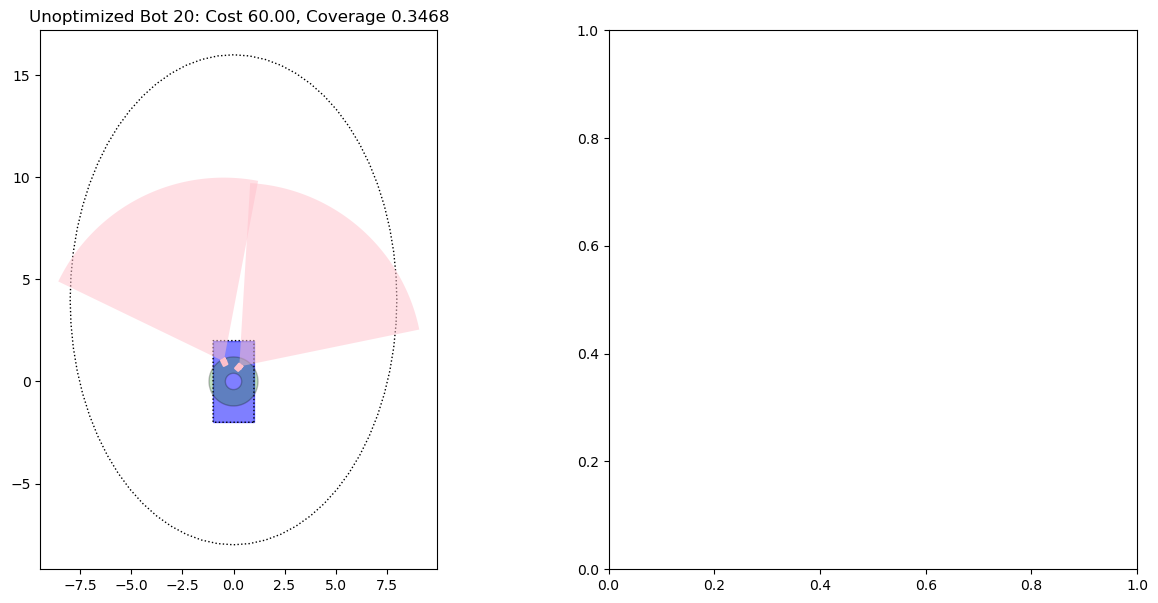

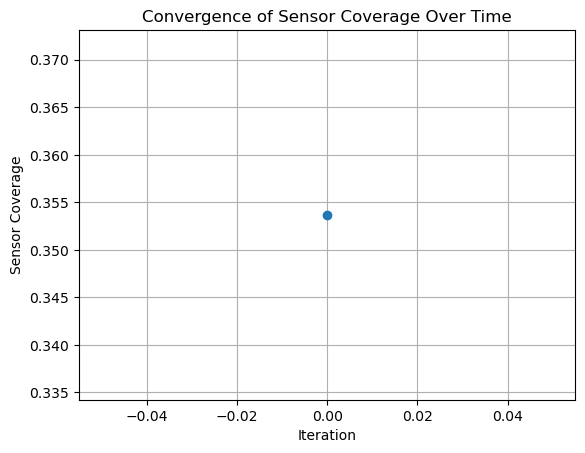

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.8245865345718616, 0.5368341705593469, 29.482944814155303, 0.09973036624021514, 0.7948155647744036, 198.67117300408216, 0.48753449759837464, -0.8421616689165337, 359.74744075858786]
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 Validity: True
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 Validity: True
Params: [-8.24586535e-01  5.36834171e-01  2.94829448e+01  9.97303662e-02
  7.94815565e-01  1.98671173e+02  4.87534498e-01 -8.42161669e-01
  3.59747441e+02]
 V

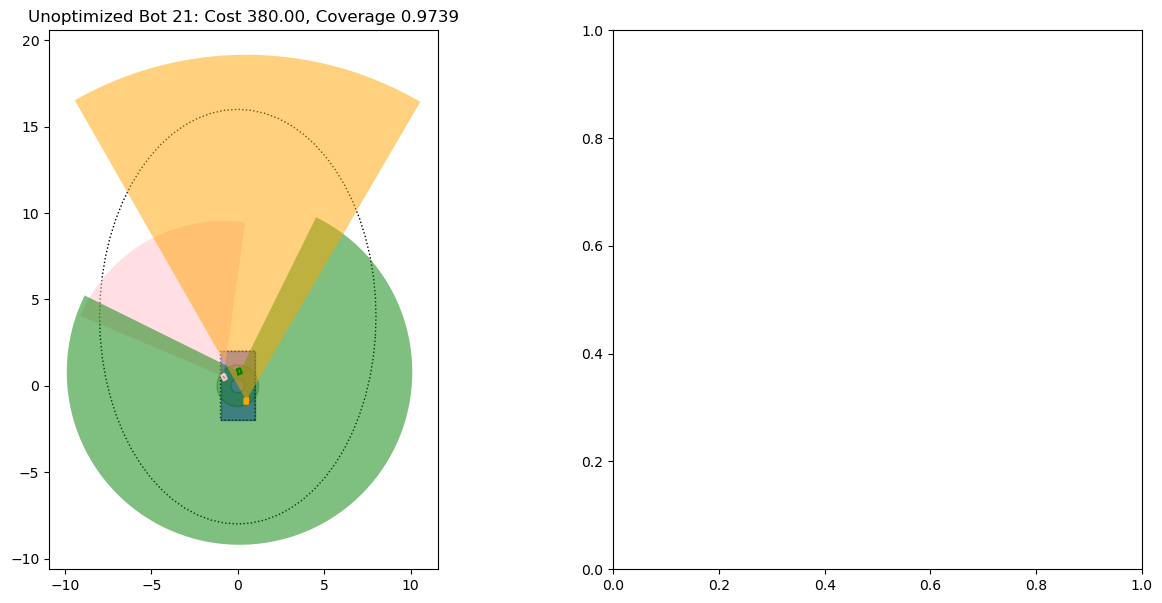

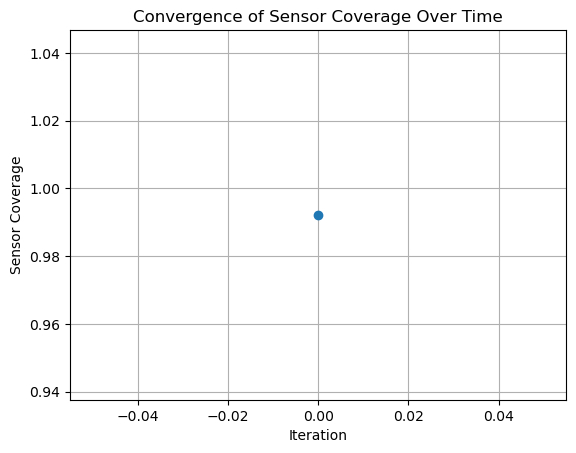

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.9134635913913052, 0.4568271963001458, 151.3281981984826, -0.6348043702189455, 0.17001239229324921, 197.3397232823782, -0.08476294259221792, 1.0184176045749092, 345.71757913280027]
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Va

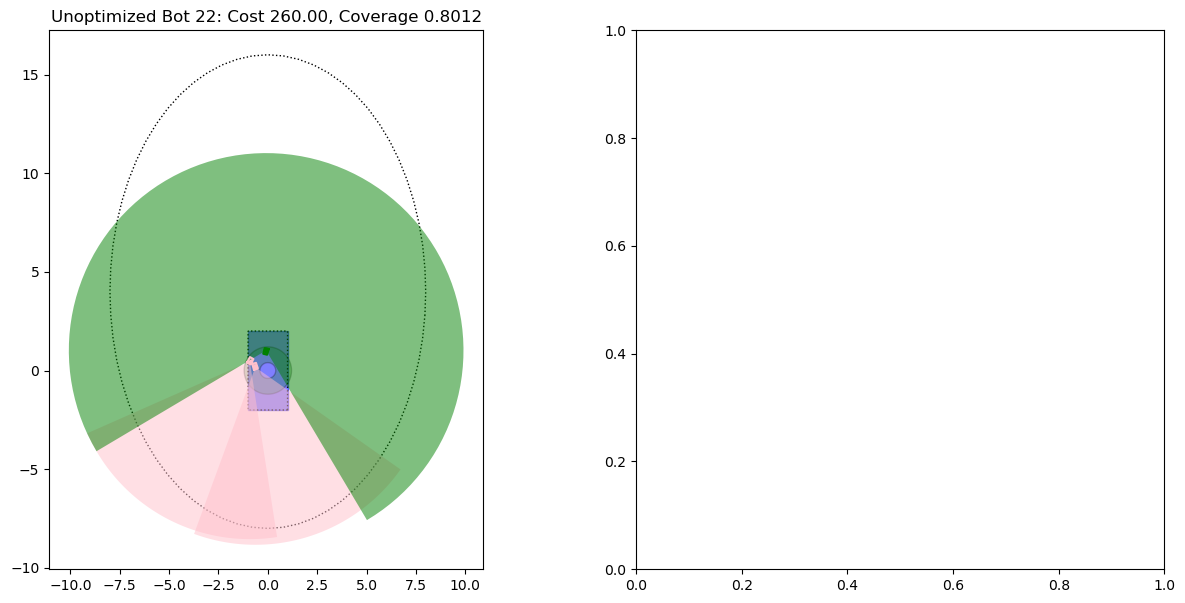

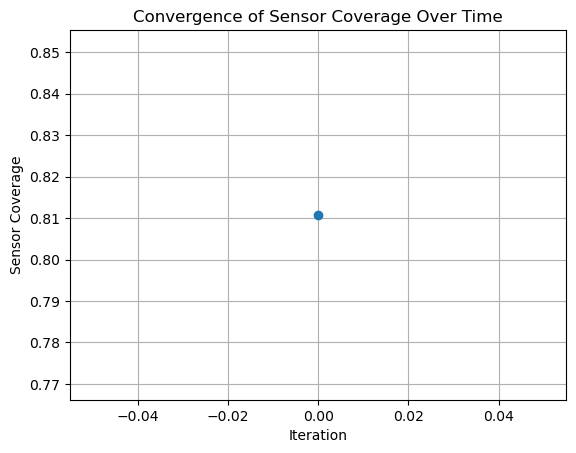

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ]))
Initial Params: [1.033792144548158, 0.3224533692040362, 8.90117352688984]
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117353]
 Validity: True
Params: [1.03379216 0.32245337 8.90117353]
 Validity: True
Params: [1.03379214 0.32245338 8.90117353]
 Validity: True
Params: [1.03379214 0.32245337 8.90117354]
 Validity: True
Params: [1.03921337 0.32475472 8.90116688]
 Validity: False
Params: [1.03921337 0.32475472 8.90116688]
 Validity: False
Params: [1.03921338 0.32475472 8.90116688]
 Validity: False
Params: [1.03921337 0.32475473 8.90116688]
 Validity: False
Params: [1.03921337 0.32475472 8.9011669 ]
 Validity: False
Params: [1.0659821  0.33622421 8.90116936]
 Validity: False
Params: [1.0659821  0.33622421 8.90116936]
 Validity: False
Params: [1.06598211 0.33622421 8.90116

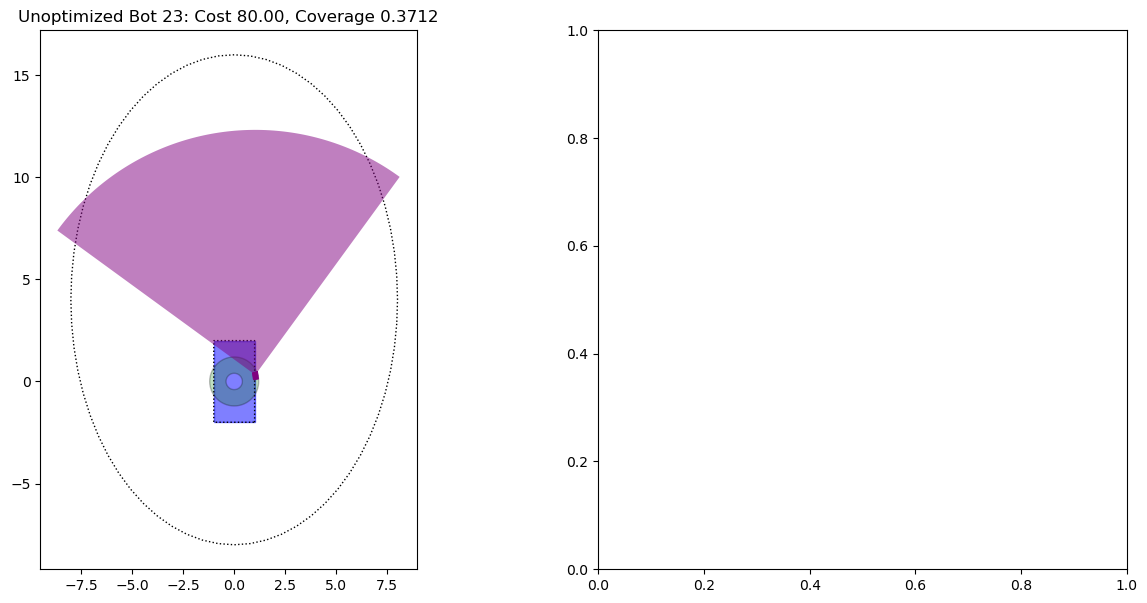

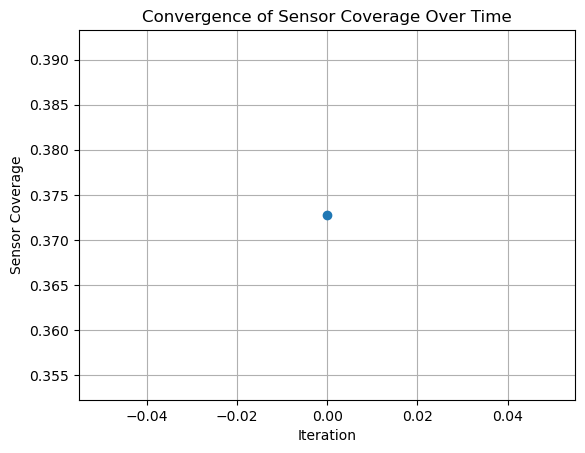

<Figure size 640x480 with 0 Axes>

Bounds: Bounds(array([-1.19951818, -1.19951818,  0.        , -1.19951818, -1.19951818,
        0.        , -1.19951818, -1.19951818,  0.        ]), array([  1.19951818,   1.19951818, 360.        ,   1.19951818,
         1.19951818, 360.        ,   1.19951818,   1.19951818,
       360.        ]))
Initial Params: [-0.9134635913913052, 0.4568271963001458, 151.3281981984826, -0.6348043702189455, 0.17001239229324921, 197.3397232823782, -0.08476294259221792, 1.0184176045749092, 345.71757913280027]
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Validity: True
Params: [-9.13463591e-01  4.56827196e-01  1.51328198e+02 -6.34804370e-01
  1.70012392e-01  1.97339723e+02 -8.47629426e-02  1.01841760e+00
  3.45717579e+02]
 Va

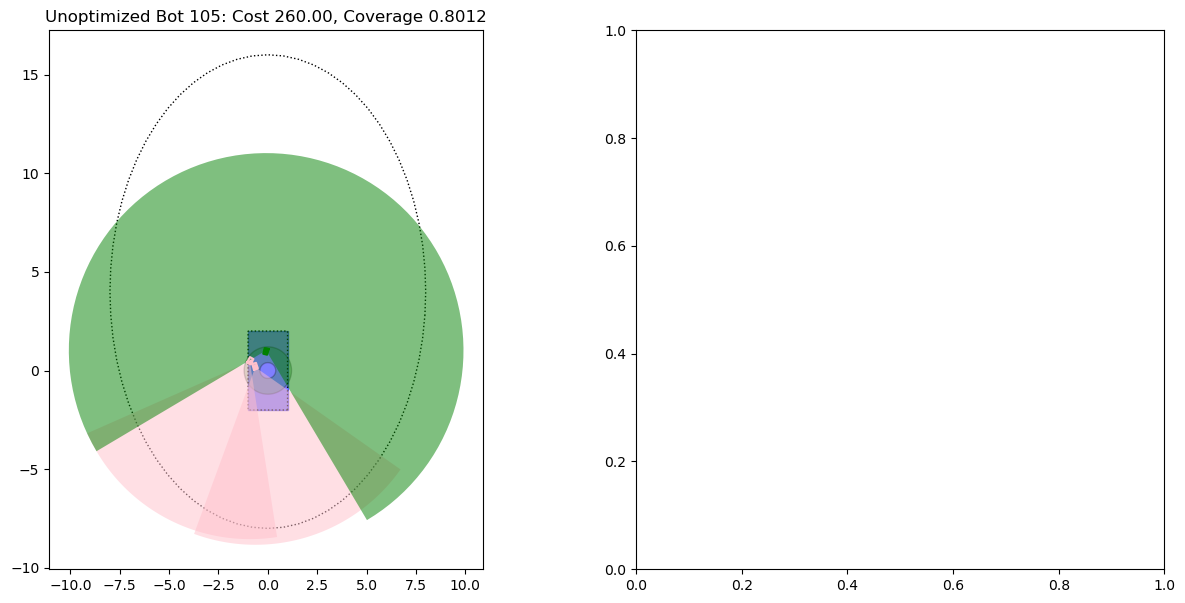

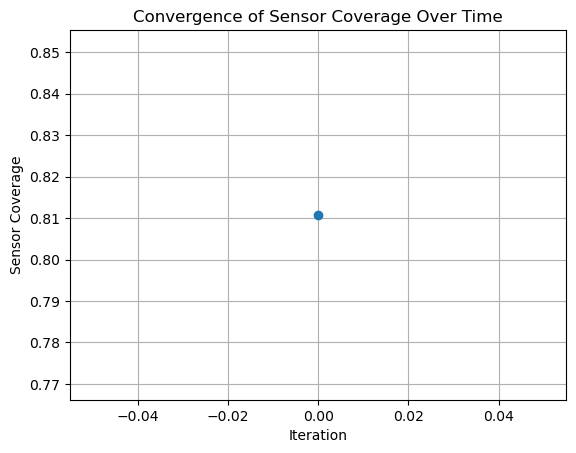

<Figure size 640x480 with 0 Axes>

In [26]:
pareto_front_indices = np.where(res.F[:, 0] < 1)[0]  # Assuming the first objective is the perception coverage

for idx in pareto_front_indices:
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    bot = problem.convert_1D_to_bot(res.X[idx])
    bot.plot_bot(show_constraint=True, title=f"Unoptimized Bot {idx}: Cost {res.F[idx, 1]:.2f}, Coverage {1-res.F[idx, 0]:.4f}", ax=axes[0])
    
    bot_optimal = copy.deepcopy(bot)
    bot_optimal.optimize_sensor_placement(plot=True)
    bot_optimal.plot_bot(show_constraint=True, title=f"Optimized Bot {idx}: Cost {bot_optimal.get_pkg_cost():.2f}, Coverage {bot_optimal.get_sensor_coverage():.4f}", ax=axes[1])
    
    plt.tight_layout()
    plt.show()